# CTM MILP Formulation

In [1]:
from ctmmodels.base import BaseModel
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint

## Constants

In [6]:
# Constants from the parent paper

TOTAL_CELL_COUNT    = 32
MOVEMENT_CELLS      = 3 # Number of movement cells per approach
APPROACH_CELLS      = 3 # Number of cells in each approach
APPROACHES          = 4 # Number of approaches per intersection
APPROACH_LANES      = 4 # Number of lanes per approach

FREE_FLOW_SPEED     = 44 # ft / s
CELL_LENGTH         = 88 # ft
SAT_FLOW_RATE       = 1 # vehicles / timestep
FLOW_RATE_REDUCTION = 0.5 # Not speciifed
G_MIN               = 6 # seconds (change to 30)
G_MAX               = 20 # seconds (change to 120)

FLOW_UNDERSAT       = 450 # veh / hr / lane
FLOW_SAT            = 900 
FLOW_OVERSAT        = 1800

TURN_RATIO_LEFT     = 0.1
TURN_RATIO_THROUGH  = 0.8
TURN_RATIO_RIGHT    = 0.1
TURN_RATIOS = [
    TURN_RATIO_LEFT,
    TURN_RATIO_THROUGH,
    TURN_RATIO_RIGHT
]

LEFT_TURN_LANES     = 1
RIGHT_TURN_LANES    = 1
THROUGH_TURN_LANES  = APPROACH_LANES - LEFT_TURN_LANES - RIGHT_TURN_LANES
if THROUGH_TURN_LANES <= 0:
    THROUGH_TURN_LANES = 1
TURN_LANES = [
    LEFT_TURN_LANES,
    THROUGH_TURN_LANES,
    RIGHT_TURN_LANES
]

TIME_STEP           = 1 # seconds / time step; NOT FROM PAPER
TIME_RANGE          = 60 # run for this many seconds

MEAN_CAR_LENGTH     = 15.8 # ft

CELL_SOURCE         = 0
CELL_SINK           = 1
CELL_MOVEMENT       = 2
CELL_NORMAL         = 3

LEFT_TURN           = 0
THROUGH_TURN        = 1
RIGHT_TURN          = 2

## Instantiating the Model

In [3]:
model = BaseModel(time_step=1, time_range=60)

model.generate()
model.solve()

Solving...
Done!
Time elapsed: 0.131483078003


0.1314830780029297

## Getting Model Descriptions

In [17]:
model._g_count

720

## Showing the Cell Capacities

In [4]:
df_x, df_y, df_g = model.return_solution()

In [8]:
df_x_source = df_x[df_x.cell == (CELL_SOURCE,0,1)].sort_values(by='timestep')
df_x_normal0 = df_x[df_x.cell == (CELL_NORMAL,0,1)].sort_values(by='timestep')
df_x_normal1 = df_x[df_x.cell == (CELL_NORMAL,1,1)].sort_values(by='timestep')
df_x_normal2 = df_x[df_x.cell == (CELL_NORMAL,2,1)].sort_values(by='timestep')
df_x_left = df_x[df_x.cell == (CELL_MOVEMENT,THROUGH_TURN,1)].sort_values(by='timestep')
df_x_sink = df_x[df_x.cell == model.S[(CELL_MOVEMENT,THROUGH_TURN,1)][0]].sort_values(by='timestep')

df_x_approach = df_x_source.append(df_x_normal1).append(df_x_normal2).append(df_x_normal0).append(df_x_left).append(df_x_sink)
df_x_approach = df_x_approach.pivot(index='timestep', columns='cell', values='volume')
df_x_approach

cell,"(0, 0, 1)","(1, 0, 3)","(2, 1, 1)","(3, 0, 1)","(3, 1, 1)","(3, 2, 1)"
timestep,,,,,,
0,0.000222,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000222,0.000000,0.000000,0.000222,0.000000,0.000000
2,0.000222,0.000000,0.000000,0.000222,0.000222,0.000000
3,0.000222,0.000000,0.000000,0.000222,0.000222,0.000222
4,0.000222,0.000000,0.000178,0.000222,0.000222,0.000222
5,0.000222,0.000222,0.000178,0.000222,0.000222,0.000222
6,0.000222,0.000222,0.000178,0.000222,0.000222,0.000222
7,0.000222,0.000222,0.000178,0.000222,0.000222,0.000222
8,0.000222,0.000222,0.000178,0.000222,0.000222,0.000222


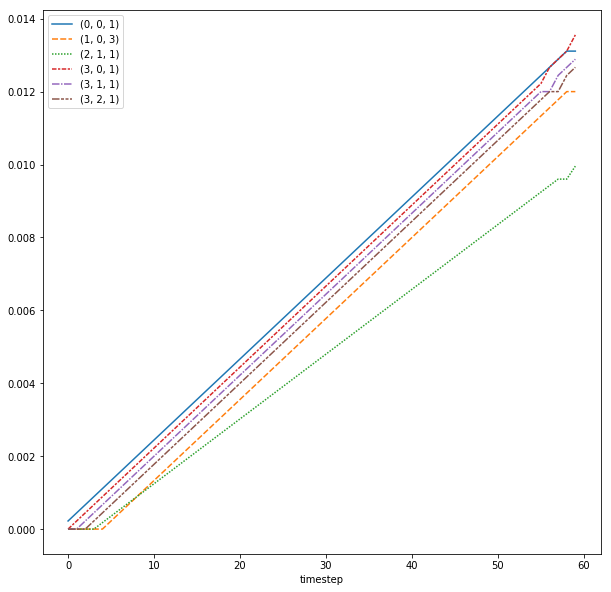

In [9]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_x_approach.cumsum())

This linear, cascading cumulative sum of consecutive cells (except for the through cell) means that the turning ratio is working fine.

In [11]:
df_y_source = df_y[df_y.cell_from == (CELL_SOURCE,0,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal0 = df_y[df_y.cell_from == (CELL_NORMAL,0,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal1 = df_y[df_y.cell_from == (CELL_NORMAL,1,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal2 = df_y[df_y.cell_from == (CELL_NORMAL,2,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal2 = df_y[df_y.cell_from == (CELL_NORMAL,2,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_left = df_y[df_y.cell_from == (CELL_MOVEMENT,LEFT_TURN,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_sink = df_y[df_y.cell_from == model.S[(CELL_MOVEMENT,LEFT_TURN,1)][0]].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')

df_y_approach = df_y_source.append(df_y_normal1).append(df_y_normal2).append(df_y_normal0).append(df_y_left).append(df_y_sink)
df_y_approach.reset_index(inplace=True)
df_y_approach = df_y_approach.pivot(index='timestep', columns='cell_from', values='flow')
df_y_approach

cell_from,"(0, 0, 1)","(2, 0, 1)","(3, 0, 1)","(3, 1, 1)","(3, 2, 1)"
timestep,,,,,
0,0.000222,0.000000,0.000000,0.000000,0.000000
1,0.000222,0.000000,0.000222,0.000000,0.000000
2,0.000222,0.000000,0.000222,0.000222,0.000000
3,0.000222,0.000000,0.000222,0.000222,0.000222
4,0.000222,0.000022,0.000222,0.000222,0.000222
5,0.000222,0.000022,0.000222,0.000222,0.000222
6,0.000222,0.000022,0.000222,0.000222,0.000222
7,0.000222,0.000022,0.000222,0.000222,0.000222
8,0.000222,0.000022,0.000222,0.000222,0.000222


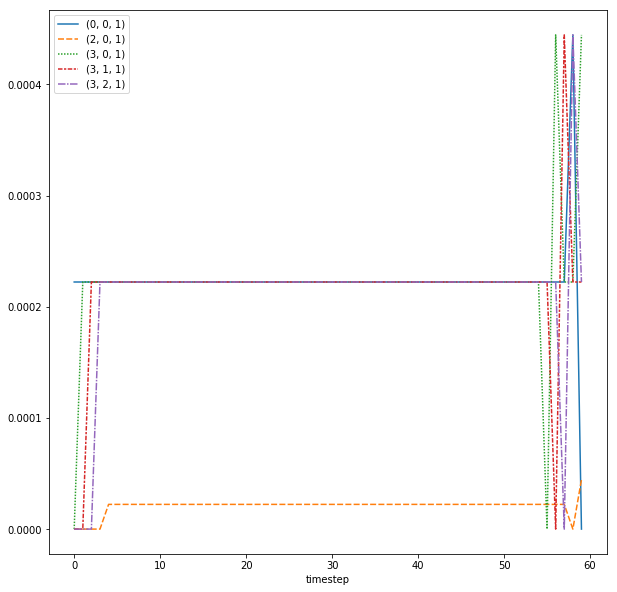

In [12]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_y_approach)